## COVID-19 Pandemic in Saudi Arabia Project


## Table of Contents
- [Introduction](#intro)
- [Basic Insights and pre-processing the Dataset](#1)
- [Advannced Processing](#2)
- [Visualization](#3)


<a id='intro'></a>
### Introduction

In this project I will be working on analysis and visualization using data science techniques provided by KSU Data Science & Big Data Bootcamp to analyze the Covid-19 dataset. Covid-19 also called Coronaviruses is a virus that appeared in late 2019 and make a big impact on many sectors. It caused serious incidents and deaths around the world. The analysis will be specifically on the pandemic in Saudi Arabia.

<a id='1'></a>
### Basic Insights and pre-processing the Dataset

To get started, let's import our libraries.

In [305]:
# import libraries
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import plotly.express as plot


In [15]:
csv_file = 'SA-COVID19v1.csv'
covid_df = pd.read_csv(csv_file, low_memory=True)

In [17]:
covid_df.head()

,Daily / Cumulative,Indicator,Date,Event,region,City,Cases
0,Daily,Cases,3/2/2020,First case of COVID-19,Eastern Region,Qatif,1
1,Daily,Cases,3/4/2020,Umrah suspension,Eastern Region,Qatif,1
2,Daily,Cases,3/7/2020,NaN,Eastern Region,Qatif,2
3,Daily,Cases,3/8/2020,NaN,Total,Total,4
4,Daily,Cases,3/10/2020,NaN,Eastern Region,Dammam,4


In [20]:
covid_df.shape #check the number of records and columns

(30873, 7)

In [18]:
covid_df.info() #check the nulls and types of the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30873 entries, 0 to 30872
Data columns (total 7 columns):
Daily / Cumulative    30873 non-null object
Indicator             30873 non-null object
Date                  30873 non-null object
Event                 1144 non-null object
region                30867 non-null object
City                  30867 non-null object
Cases                 30867 non-null object
dtypes: object(7)
memory usage: 1.6+ MB


- As we can see above all the data are from type "object"
- "Event" columns have Nulls value and only 1144 non-nulls
- Also region, City, and Cases has 6 Nan values

#### Change the data type 
- change "Date" to timestamp
- change "Cases" to integer

In [21]:
covid_df['Date'] = pd.to_datetime(covid_df.Date) #by changing the type the +0000 will be removed
covid_df['Date'] #check

0       2020-03-02
1       2020-03-04
2       2020-03-07
3       2020-03-08
4       2020-03-10
5       2020-03-12
6       2020-03-13
7       2020-03-16
8       2020-03-16
9       2020-03-16
10      2020-03-17
11      2020-03-18
12      2020-03-19
13      2020-03-19
14      2020-03-20
15      2020-03-20
16      2020-03-20
17      2020-03-20
18      2020-03-23
19      2020-03-23
20      2020-03-24
21      2020-03-24
22      2020-03-24
23      2020-03-26
24      2020-03-26
25      2020-03-26
26      2020-03-27
27      2020-03-27
28      2020-03-27
29      2020-03-27
           ...    
30843   2020-05-12
30844   2020-05-12
30845   2020-05-12
30846   2020-05-12
30847   2020-05-12
30848   2020-05-12
30849   2020-05-12
30850   2020-05-12
30851   2020-05-12
30852   2020-05-12
30853   2020-05-12
30854   2020-05-12
30855   2020-05-12
30856   2020-05-13
30857   2020-05-13
30858   2020-05-13
30859   2020-05-13
30860   2020-05-13
30861   2020-05-13
30862   2020-05-13
30863   2020-05-13
30864   2020

#### Check unique values to classify 

In [44]:
covid_df['Daily / Cumulative'].unique()

array(['Daily', 'Cumulative'], dtype=object)

In [45]:
covid_df['Indicator'].unique()

array(['Cases', 'Recoveries', 'Mortalities', 'Active cases',
       'Critical cases'], dtype=object)

In [46]:
covid_df['region'].unique()

array(['Eastern Region', 'Total', 'Mecca', 'Riyadh', 'Al Bahah', 'Asir',
       'Qassim', 'Medina', 'Jazan', 'Najran', 'Tabuk', 'Hail', 'Al Jouf',
       'Northern Borders', nan], dtype=object)

In [59]:
covid_df['Cases'] = covid_df['Cases'].replace('?',np.nan)

> **Found '?' in "Cases" numbers so I will consider them as nan**

> **I will make a new dataframe and drop any nan in "Case" column to make the results accurate**

In [62]:
covid_clean_df = covid_df[covid_df['Cases'].notna()]

In [63]:
covid_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30867 entries, 0 to 30872
Data columns (total 7 columns):
Daily / Cumulative    30867 non-null object
Indicator             30867 non-null object
Date                  30867 non-null datetime64[ns]
Event                 1143 non-null object
region                30861 non-null object
City                  30861 non-null object
Cases                 30867 non-null object
dtypes: datetime64[ns](1), object(6)
memory usage: 1.9+ MB


- We still have Nulls in region and City

In [74]:
covid_clean_df[covid_clean_df['region'].isna()]

,Daily / Cumulative,Indicator,Date,Event,region,City,Cases
6282,Cumulative,Critical cases,2020-05-28,NaN,NaN,NaN,0
16639,Cumulative,Critical cases,2020-05-26,NaN,NaN,NaN,0
16640,Cumulative,Critical cases,2020-05-30,NaN,NaN,NaN,0
18790,Cumulative,Critical cases,2020-05-29,NaN,NaN,NaN,0
26890,Cumulative,Critical cases,2020-05-27,NaN,NaN,NaN,0
26891,Cumulative,Critical cases,2020-05-31,NaN,NaN,NaN,0


- As we don't have any cases we can drop the records
- We also have (Total) in the regions which needs to be droped

In [68]:
covid_clean_df[covid_clean_df['region']=="Total"]

,Daily / Cumulative,Indicator,Date,Event,region,City,Cases
3,Daily,Cases,2020-03-08,NaN,Total,Total,4
21,Daily,Cases,2020-03-24,NaN,Total,Total,205
43,Daily,Cases,2020-04-02,"Makkah , Madinah 24 hours curfew",Total,Total,165
75,Daily,Cases,2020-04-12,NaN,Total,Total,472
93,Daily,Cases,2020-04-16,NaN,Total,Total,762
96,Daily,Cases,2020-04-17,NaN,Total,Total,1132
102,Daily,Cases,2020-04-18,NaN,Total,Total,1088
117,Daily,Cases,2020-04-21,NaN,Total,Total,1141
157,Daily,Cases,2020-04-28,NaN,Total,Total,1325
168,Daily,Cases,2020-04-29,NaN,Total,Total,1351


In [77]:
covid_clean_df = covid_clean_df[covid_clean_df['region']!="Total"] #drop total records
covid_clean_df = covid_clean_df[covid_clean_df['region'].notna()] #drop null

In [101]:
# we also can use the following statement
# covid_clean_df.dropna(subset = ["region"], axis = 0, inplace = True)

In [78]:
covid_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30148 entries, 0 to 30872
Data columns (total 7 columns):
Daily / Cumulative    30148 non-null object
Indicator             30148 non-null object
Date                  30148 non-null datetime64[ns]
Event                 1067 non-null object
region                30148 non-null object
City                  30148 non-null object
Cases                 30148 non-null object
dtypes: datetime64[ns](1), object(6)
memory usage: 1.8+ MB


> We can replace null events with 'No Event'

In [81]:
covid_clean_df['Event'].replace(np.nan,'No Event', inplace=True)

> Change the Cases type to to some calculations

In [85]:
covid_clean_df['Cases'] = covid_clean_df['Cases'].astype("float").astype("Int64")

In [86]:
covid_clean_df.describe() #statistical covid_clean_df

,Cases
count,30148.000000
mean,232.755639
std,1347.496807
min,-9.000000
25%,2.000000
50%,8.000000
75%,34.000000
max,33958.000000


>**We only need the daily data**

In [91]:
covid_clean_df = covid_clean_df[covid_clean_df['Daily / Cumulative'] == "Daily"]
covid_clean_df['Daily / Cumulative'].unique()

array(['Daily'], dtype=object)

- Drop 'Daily / Cumulative' and 'Event' columns as we are do not need them

In [92]:
covid_clean_df.drop(columns=['Daily / Cumulative', 'Event'], inplace=True)

In [93]:
covid_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6157 entries, 0 to 30207
Data columns (total 5 columns):
Indicator    6157 non-null object
Date         6157 non-null datetime64[ns]
region       6157 non-null object
City         6157 non-null object
Cases        6157 non-null Int64
dtypes: Int64(1), datetime64[ns](1), object(3)
memory usage: 294.6+ KB


In [94]:
covid_clean_df.describe()

,Cases
count,6157.000000
mean,34.631639
std,107.110167
min,1.000000
25%,1.000000
50%,3.000000
75%,13.000000
max,1735.000000


In [100]:
covid_clean_df.duplicated().unique()#check if we have duplicated data

array([False])

<a id='2'></a>
### Advanced Processing
In this part I will working on the advanced processing part to the data.

#### Data Binning 

In [112]:
bins = np.linspace(covid_clean_df["Cases"].min(), covid_clean_df["Cases"].max(), 5)
catgory = ["Low", "Mid", "High","Very high"]
covid_clean_df["Cases_bins"] = pd.cut(covid_clean_df["Cases"], bins, labels = catgory, include_lowest = True)
covid_clean_df["Cases_bins"]
print(covid_clean_df[["Cases", "Cases_bins"]])

       Cases Cases_bins
0          1        Low
1          1        Low
2          2        Low
4          4        Low
5         21        Low
6         26        Low
7          4        Low
8          2        Low
9          5        Low
10        10        Low
11        23        Low
12         4        Low
13         3        Low
16         1        Low
17        11        Low
18         6        Low
19        18        Low
20         6        Low
22        82        Low
23         2        Low
24        26        Low
25        13        Low
26         2        Low
27         4        Low
28         1        Low
29         2        Low
30         1        Low
31        14        Low
32         1        Low
33         1        Low
...      ...        ...
30172      1        Low
30173      2        Low
30175      1        Low
30176      9        Low
30179      1        Low
30180      2        Low
30181      2        Low
30182      1        Low
30183      1        Low
30184      2    

In [113]:
covid_clean_df.sample(10)

,Indicator,Date,region,City,Cases,Cases_bins
7463,Recoveries,2020-06-10,Mecca,Jeddah,480,Mid
30066,Recoveries,2020-06-09,Najran,Najran,21,Low
29525,Cases,2020-06-05,Riyadh,Sajer,1,Low
17478,Recoveries,2020-05-09,Mecca,Taif,1,Low
16889,Cases,2020-05-10,Riyadh,Diriyah,25,Low
20123,Mortalities,2020-06-13,Eastern Region,Qatif,2,Low
6612,Cases,2020-05-15,Northern Borders,Al Judayyidah,3,Low
226,Cases,2020-05-09,Mecca,Mecca,438,Mid
551,Cases,2020-06-06,Riyadh,Muzahmiya,13,Low
30165,Mortalities,2020-05-13,Riyadh,Riyadh,1,Low


In [114]:
covid_clean_df['Cases_bins'].unique()

[Low, Mid, Very high, High]
Categories (4, object): [Low < Mid < High < Very high]

In [116]:
covid_clean_df[covid_clean_df['Cases_bins'] == 'Mid'].head()

,Indicator,Date,region,City,Cases,Cases_bins
162,Cases,2020-04-29,Riyadh,Riyadh,440,Mid
226,Cases,2020-05-09,Mecca,Mecca,438,Mid
251,Cases,2020-05-12,Riyadh,Riyadh,673,Mid
324,Cases,2020-05-18,Riyadh,Riyadh,730,Mid
335,Cases,2020-05-19,Riyadh,Riyadh,815,Mid


#### Descriptive Statistics

> Indicator vs. Cases

In [122]:
covid_clean_df.groupby(['Indicator']).agg({'Cases':'sum'})

,Cases
Indicator,
Cases,127535
Mortalities,972
Recoveries,84720


In [121]:
covid_clean_df.groupby(['Indicator']).describe()

Cases                                                    
              count       mean         std  min  25%  50%   75%     max
Indicator                                                              
Cases        3615.0  35.279391  106.940821  1.0  1.0  3.0  15.0  1735.0
Mortalities   316.0   3.075949    3.296067  1.0  1.0  2.0   4.0    18.0
Recoveries   2226.0  38.059299  114.063984  1.0  1.0  3.0  14.0  1499.0

> **Breaking Down the Descriptive Statistics**

In [152]:
#Count
covid_clean_df.groupby(['Indicator'])['Cases'].count()

Indicator
Cases          3615
Mortalities     316
Recoveries     2226
Name: Cases, dtype: int64

In [153]:
#Mean
covid_clean_df.groupby(['Indicator'])['Cases'].mean()

Indicator
Cases          35.279391
Mortalities     3.075949
Recoveries     38.059299
Name: Cases, dtype: float64

In [156]:
#Median
covid_clean_df.groupby(['Indicator'])['Cases'].median()

Indicator
Cases          3
Mortalities    2
Recoveries     3
Name: Cases, dtype: Int64

In [154]:
#Minimum
covid_clean_df.groupby(['Indicator'])['Cases'].min()

Indicator
Cases          1
Mortalities    1
Recoveries     1
Name: Cases, dtype: Int64

In [155]:
#Maximum
covid_clean_df.groupby(['Indicator'])['Cases'].max()

Indicator
Cases          1735
Mortalities      18
Recoveries     1499
Name: Cases, dtype: Int64

In [153]:
#standard deviation
covid_clean_df.groupby(['Indicator'])['Cases'].std()

Indicator
Cases          35.279391
Mortalities     3.075949
Recoveries     38.059299
Name: Cases, dtype: float64

#### Grouping Data

> Indicator vs. Region vs. Cases

In [141]:
(covid_clean_df.groupby(['Indicator','region'])
 .agg({'Cases':'sum'})
#  .reset_index()
 .sort_values('Cases', ascending = False))

Cases
Indicator   region                 
Cases       Mecca             43743
            Riyadh            37719
Recoveries  Mecca             31693
Cases       Eastern Region    26121
Recoveries  Riyadh            21467
            Eastern Region    16455
Cases       Medina            12079
Recoveries  Medina            10059
Cases       Asir               1999
            Jazan              1554
            Qassim             1498
            Tabuk              1144
Recoveries  Jazan              1117
            Tabuk               975
            Qassim              932
            Asir                927
Mortalities Mecca               677
Cases       Hail                530
            Najran              492
Recoveries  Hail                325
Cases       Northern Borders    320
Recoveries  Najran              259
Cases       Al Bahah            252
Recoveries  Northern Borders    250
            Al Bahah            193
Mortalities Riyadh              108
Cases       Al Jouf              84
Mortalities Eastern Region       74
            Medina               74
Recoveries  Al Jouf              68
Mortalities Jazan                13
            Tabuk                10
            Qassim                8
            Northern Borders      4
            Asir                  3
            Al Bahah              1

- We can also preview it as pivot as the following

In [148]:
(pd.pivot_table(covid_clean_df.rename(columns={'Cases':'Number of Cases'})
                , index=['region'], columns=['Indicator'], aggfunc= {'Number of Cases': 'sum'})
 .fillna(0)
)

Number of Cases                       
Indicator                  Cases Mortalities Recoveries
region                                                 
Al Bahah                     252           1        193
Al Jouf                       84           0         68
Asir                        1999           3        927
Eastern Region             26121          74      16455
Hail                         530           0        325
Jazan                       1554          13       1117
Mecca                      43743         677      31693
Medina                     12079          74      10059
Najran                       492           0        259
Northern Borders             320           4        250
Qassim                      1498           8        932
Riyadh                     37719         108      21467
Tabuk                       1144          10        975

<a id='3'></a>
### Visualization
In this project 4 types of visualization will be made
- Line Plot
- Area Plot
- Pie Chart
- Visualizing Geospatial Data

#### 1. Line Plot
> **Line for every week and only “Cases”**

In [180]:
covid_clean_df['week'] = covid_clean_df['Date'].dt.week ##add week column from date 

In [277]:
covid_weeks = (covid_clean_df.query('Indicator == "Cases"')
               .groupby(['week'])
               .agg({'Cases':'sum'})
               .reset_index())

In [278]:
covid_weeks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
week     15 non-null int64
Cases    15 non-null Int64
dtypes: Int64(1), int64(1)
memory usage: 335.0 bytes


In [281]:
fig = plot.line(covid_weeks, x="week", y="Cases", title='Every Week Cases')
fig.show()

#### 2. Area Plot
> **Top 5: Total Cases Cities**

In [296]:
top5_df = (covid_clean_df
           .groupby(['City'])
           .agg({'Cases':'sum'})
           .sort_values('Cases',ascending = False)
#            .reset_index()
          ).head(5)

In [297]:
top5_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, Riyadh to Dammam
Data columns (total 1 columns):
Cases    5 non-null Int64
dtypes: Int64(1)
memory usage: 85.0+ bytes


In [298]:
top5_df

,Cases
City,
Riyadh,53817
Jeddah,34828
Mecca,34816
Medina,20988
Dammam,13075


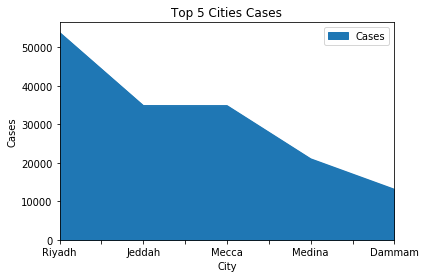

In [304]:
## Area Plot
top5_df.plot(kind = "area")
plt.title('Top 5 Cities Cases')
plt.ylabel('Cases')
plt.xlabel('City')
plt.show()

#### 3. Pie Chart
> **total cases in regions.**

In [259]:
fig = plot.pie(covid_clean_df, values='Cases', names='region', title='Total Cases in Regions')
fig.show()

#### 4. Visualizing Geospatial Data
> **total cases in regions.**